# The Premier League Home Invasion

In [1]:
import pandas as pd

df = pd.read_csv("premier_league_merged.csv")

df

C:\Users\Owner\AppData\Local\Temp\ipykernel_24908\3317907759.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("premier_league_merged.csv")


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Season
0,E0,1993-08-14,NaN,Arsenal,Coventry,0.0,3.0,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
1,E0,1993-08-14,NaN,West Ham,Wimbledon,0.0,2.0,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
2,E0,1993-08-14,NaN,Southampton,Everton,0.0,2.0,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
3,E0,1993-08-14,NaN,Sheffield United,Swindon,3.0,1.0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
4,E0,1993-08-14,NaN,Oldham,Ipswich,0.0,3.0,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12319,E0,2025-05-25,16:00,Fulham,Man City,0.0,2.0,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
12320,E0,2025-05-25,16:00,Bournemouth,Leicester,2.0,0.0,H,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
12321,E0,2025-05-25,16:00,Wolves,Brentford,1.0,1.0,D,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
12322,E0,2025-05-25,16:00,Ipswich,West Ham,1.0,3.0,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025


In [2]:
# Group by season and get multiple stats including FTR percentages
season_stats = df.groupby('Season').agg({
    'FTHG': ['mean'],  # Average home goals
    'FTAG': ['mean'],  # Average away goals
    'FTR': ['count', lambda x: (x == 'H').mean(), lambda x: (x == 'A').mean(), lambda x: (x == 'D').mean()]
})

# Flatten the column names for easier access
season_stats.columns = ['avg_home_goals', 'avg_away_goals', 'total_games', 'pct_H', 'pct_A', 'pct_D']

# Create the difference column
season_stats["diff"] = season_stats["avg_home_goals"] - season_stats["avg_away_goals"]

season_stats

,avg_home_goals,avg_away_goals,total_games,pct_H,pct_A,pct_D,diff
Season,,,,,,,
1994,1.435065,1.151515,462,0.415584,0.277056,0.307359,0.283550
1995,1.508658,1.077922,462,0.443723,0.266234,0.290043,0.430736
1996,1.526316,1.073684,380,0.489474,0.252632,0.257895,0.452632
1997,1.471053,1.081579,380,0.426316,0.260526,0.313158,0.389474
1998,1.557895,1.123684,380,0.484211,0.265789,0.250000,0.434211
1999,1.455263,1.068421,380,0.444737,0.252632,0.302632,0.386842
2000,1.671053,1.118421,380,0.492105,0.265789,0.242105,0.552632
2001,1.544737,1.065789,380,0.484211,0.250000,0.265789,0.478947
2002,1.465789,1.168421,380,0.434211,0.300000,0.265789,0.297368


In [3]:
season_stats = season_stats[season_stats.index != 2021]
from scipy import stats

# Calculate goal difference for each match
df['goal_diff'] = df['FTHG'] - df['FTAG']

# Split by season
recent_season = df[df['Season'] == 2025]['goal_diff']
historical_seasons = df[df['Season'] < 2025]['goal_diff']

# Two-sample t-test
t_stat, p_value = stats.ttest_ind(historical_seasons, recent_season)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

T-statistic: 3.037, P-value: 0.002


In [4]:
# Mann-Whitney U test (already suggested earlier)
from scipy import stats
u_stat, p_value_mw = stats.mannwhitneyu(historical_seasons, recent_season, alternative='two-sided')
print(f"Mann-Whitney U test p-value: {p_value_mw:.6f}")

# Wilcoxon rank-sum test (equivalent to Mann-Whitney)
w_stat, p_value_wilcox = stats.ranksums(historical_seasons, recent_season)
print(f"Wilcoxon rank-sum p-value: {p_value_wilcox:.6f}")

Mann-Whitney U test p-value: 0.005324
Wilcoxon rank-sum p-value: 0.006164


2025 Home Advantage: 0.092
Historical Average: 0.388
Z-score: -3.54 (Extreme Outlier)


C:\Users\Owner\AppData\Local\Temp\ipykernel_24908\496727491.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['goal_diff'] = df['FTHG'] - df['FTAG']


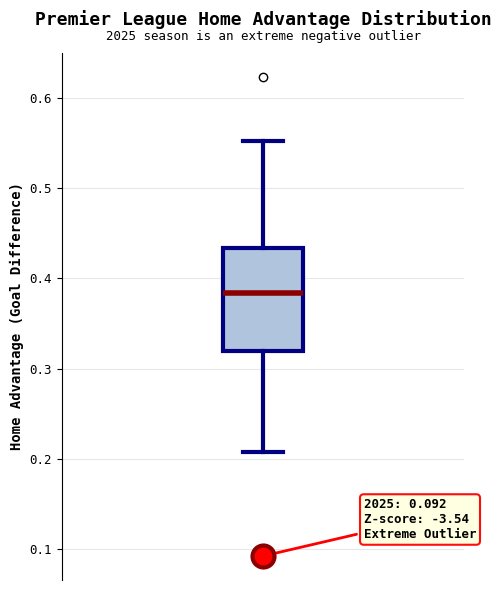

In [41]:
import sys
sys.path.append('../../style')
from style_config import StyleConfig
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Apply consistent styling
StyleConfig.apply_style()

# Override the massive default settings
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100  # Normal DPI instead of 300
plt.rcParams['font.size'] = 10    # Normal font size

def create_clean_outlier_boxplot(df):
    """
    Create a clean, single box plot showing 2025 as a clear outlier
    """
    # Calculate goal differences for each match
    df['goal_diff'] = df['FTHG'] - df['FTAG']
    
    # Get historical season means (excluding 2021 COVID season)
    historical_season_means = df[df['Season'] < 2025].groupby('Season')['goal_diff'].mean()
    current_season_mean = df[df['Season'] == 2025]['goal_diff'].mean()
    
    # Combine all data
    all_data = list(historical_season_means.values) + [current_season_mean]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(5, 6))
    
    # Create box plot
    bp = ax.boxplot([all_data], 
                    patch_artist=True, 
                    widths=0.2,
                    boxprops=dict(facecolor='lightsteelblue', color='navy', linewidth=3),
                    medianprops=dict(color='darkred', linewidth=4),
                    whiskerprops=dict(color='navy', linewidth=3),
                    capprops=dict(color='navy', linewidth=3))
    
    # Highlight 2025 as a special point
    ax.scatter([1], [current_season_mean], color='red', s=250, 
               edgecolors='darkred', linewidth=3, zorder=10,
               marker='o')
    
    # Add clean annotation for 2025
    z_score = (current_season_mean - historical_season_means.mean()) / historical_season_means.std()
    
    ax.annotate(f'2025: {current_season_mean:.3f}\nZ-score: {z_score:.2f}\nExtreme Outlier', 
                xy=(1, current_season_mean),
                xytext=(1.25, current_season_mean + 0.02),
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", 
                         facecolor='lightyellow', alpha=0.95,
                         edgecolor='red', linewidth=1.5),
                arrowprops=dict(arrowstyle='->', 
                              color='red', lw=2))
    
    # Clean styling
    ax.set_ylabel('Home Advantage (Goal Difference)', fontsize=10, fontweight='bold')
    ax.set_xlabel('')  # Remove x-label
    ax.set_xticklabels([''])  # Remove x-tick labels
    
    # Main title
    ax.set_title('Premier League Home Advantage Distribution',
                fontsize=13, fontweight='bold', pad=20)
    
    # Subtitle
    ax.text(0.5, 1.025, '2025 season is an extreme negative outlier', 
            transform=ax.transAxes, ha='center', fontsize=9, 
            )
    
    # Remove x-axis ticks
    ax.set_xticks([])
    
    # Clean grid
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_axisbelow(True)
    
    # Style the plot area
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Increase tick label size
    ax.tick_params(axis='y', labelsize=9)
    
    plt.tight_layout()
    
    # Simple print analysis
    print(f"2025 Home Advantage: {current_season_mean:.3f}")
    print(f"Historical Average: {historical_season_means.mean():.3f}")
    print(f"Z-score: {z_score:.2f} (Extreme Outlier)")
    
    return fig, ax, historical_season_means, current_season_mean

# Usage:
fig, ax, hist_data, current_data = create_clean_outlier_boxplot(df[df["Season"] != 2021])
plt.show()
# 
# # Save the plot
# fig.savefig('clean_home_advantage_outlier.png', 
#             dpi=StyleConfig.PLOT['dpi'], bbox_inches='tight')

In [80]:
df_2025 = df[df["Season"] == 2025]

# Home performance (goals scored at home vs conceded at home)
home_performance = df_2025.groupby('HomeTeam').agg({
    'FTHG': 'mean',  # Goals scored at home
    'FTAG': 'mean'   # Goals conceded at home
}).rename(columns={'FTHG': 'home_goals_for', 'FTAG': 'home_goals_against'})

# Away performance (goals scored away vs conceded away)  
away_performance = df_2025.groupby('AwayTeam').agg({
    'FTAG': 'mean',  # Goals scored away
    'FTHG': 'mean'   # Goals conceded away
}).rename(columns={'FTAG': 'away_goals_for', 'FTHG': 'away_goals_against'})

# Combine (make sure team names align)
team_stats = home_performance.join(away_performance, how='outer')

# Keep your current approach as home_adv_diff
team_stats['home_adv_diff'] = (team_stats['home_goals_for'] - team_stats['home_goals_against']) - \
                              (team_stats['away_goals_for'] - team_stats['away_goals_against'])
team_stats['home_adv_goals_for'] = team_stats['home_goals_for'] - team_stats['away_goals_for']
team_stats['home_adv_goals_against'] = team_stats['home_goals_against'] - team_stats['away_goals_against']

# Sort by overall home advantage
team_stats.sort_values('home_adv_diff', ascending=False)

,home_goals_for,home_goals_against,away_goals_for,away_goals_against,home_adv_diff,home_adv_goals_for,home_adv_goals_against
HomeTeam,,,,,,,
Aston Villa,1.789474,1.052632,1.263158,1.631579,1.105263,0.526316,-0.578947
Newcastle,2.105263,1.052632,1.473684,1.421053,1.000000,0.631579,-0.368421
Chelsea,1.842105,0.947368,1.526316,1.315789,0.684211,0.315789,-0.368421
Man City,2.263158,1.210526,1.526316,1.105263,0.631579,0.736842,0.105263
Leicester,0.789474,1.789474,0.947368,2.421053,0.473684,-0.157895,-0.631579
Nott'm Forest,1.368421,0.842105,1.684211,1.578947,0.421053,-0.315789,-0.736842
Everton,1.368421,1.210526,0.842105,1.105263,0.421053,0.526316,0.105263
Liverpool,2.210526,0.842105,2.315789,1.315789,0.368421,-0.105263,-0.473684
Wolves,1.421053,1.684211,1.421053,1.947368,0.263158,0.000000,-0.263158


Home Goals Trend: slope = 0.0034 goals/year (p = 0.037)
Away Goals Trend: slope = 0.0081 goals/year (p = 0.000)
Home Advantage Trend: slope = -0.0047 goals/year


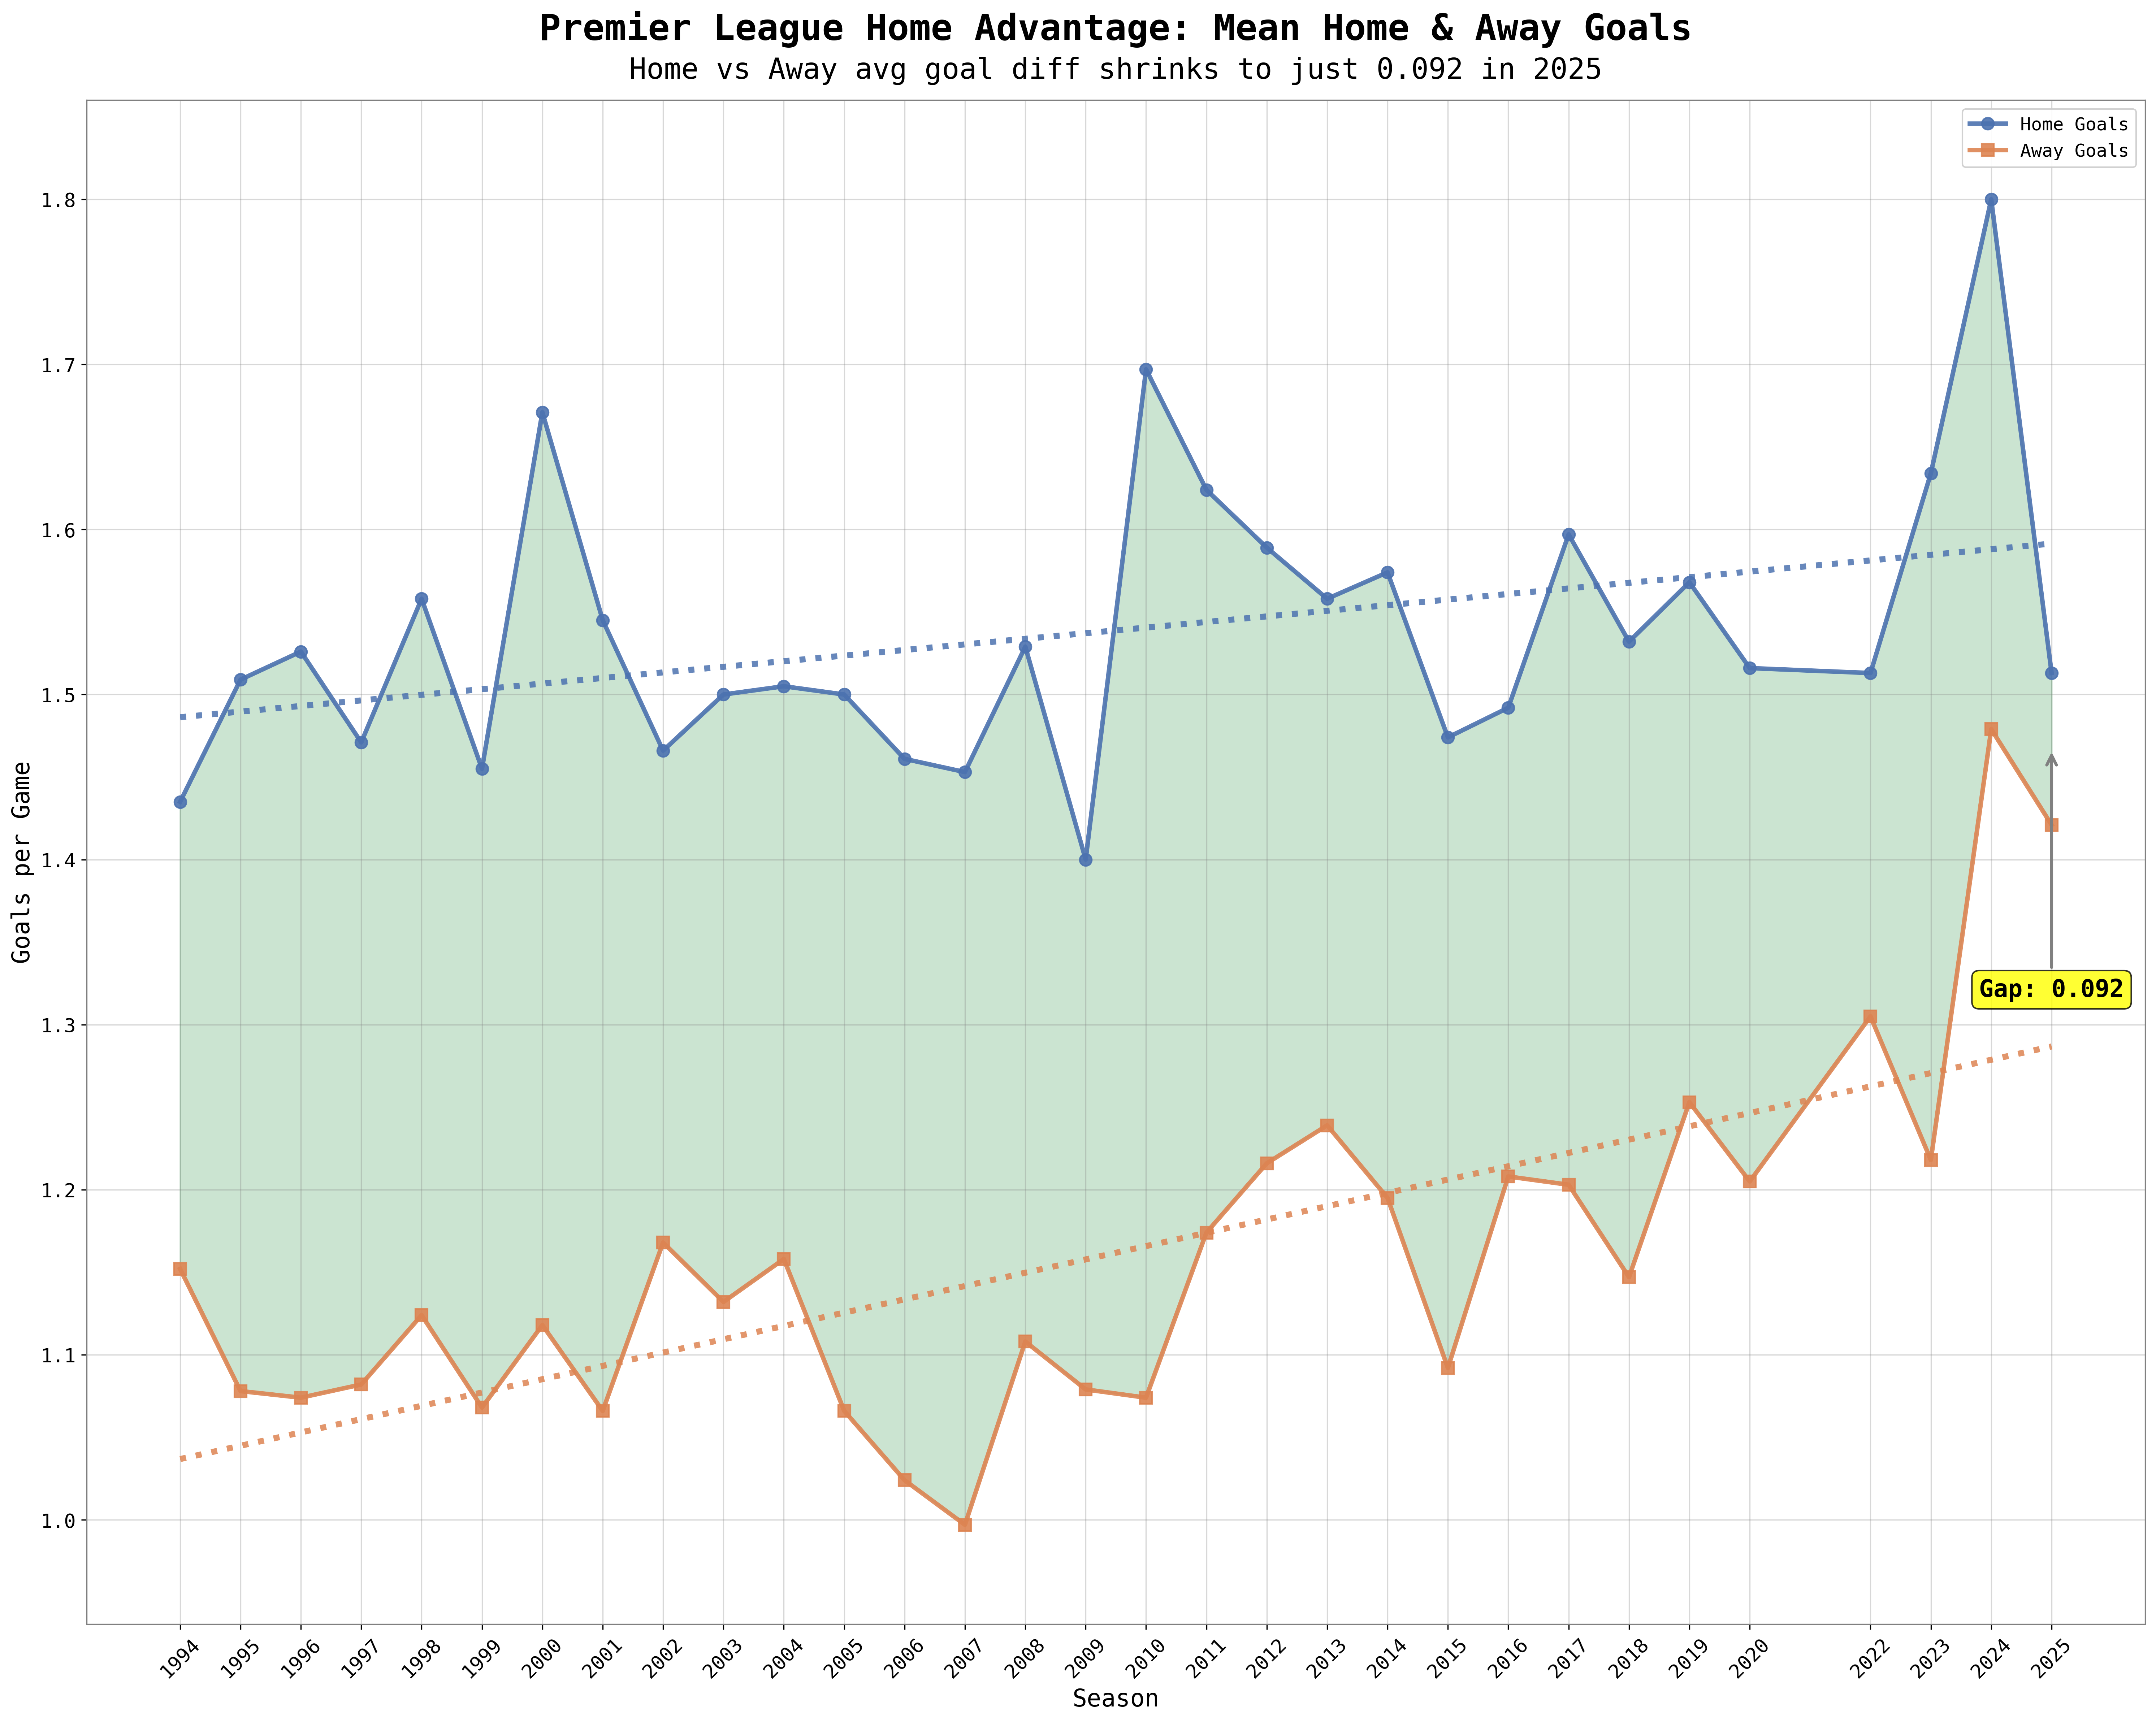

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import sys
sys.path.append('../../style')
from style_config import StyleConfig

# Apply consistent styling
StyleConfig.apply_style()

def create_home_advantage_trend(df):
    """
    Create a line chart showing home goals, away goals, and difference per season
    """
    # Calculate season stats
    season_stats = df.groupby('Season').agg({
        'FTHG': 'mean',  # Home goals
        'FTAG': 'mean',  # Away goals
    }).round(3)
    
    # Calculate difference
    season_stats['goal_diff'] = season_stats['FTHG'] - season_stats['FTAG']
    
    # Create the plot
    fig, ax = plt.subplots(figsize=StyleConfig.PLOT['figure_size'])
    
    # Get color palette
    colors = StyleConfig.get_color_palette(3)
    
    # Plot lines
    home_line = ax.plot(season_stats.index, season_stats['FTHG'], 
                       color=colors[0], linewidth=3, marker='o', markersize=8, 
                       label='Home Goals', alpha=StyleConfig.PLOT['alpha'])
    
    away_line = ax.plot(season_stats.index, season_stats['FTAG'], 
                       color=colors[1], linewidth=3, marker='s', markersize=8, 
                       label='Away Goals', alpha=StyleConfig.PLOT['alpha'])
    
    # Add trend lines
    seasons = season_stats.index.values
    home_goals = season_stats['FTHG'].values
    away_goals = season_stats['FTAG'].values
    
    # Calculate linear regression for home goals
    home_slope, home_intercept, home_r, home_p, home_se = stats.linregress(seasons, home_goals)
    home_trend_line = home_slope * seasons + home_intercept
    
    # Calculate linear regression for away goals
    away_slope, away_intercept, away_r, away_p, away_se = stats.linregress(seasons, away_goals)
    away_trend_line = away_slope * seasons + away_intercept
    
    # Plot trend lines (dotted)
    ax.plot(seasons, home_trend_line, 
           color=colors[0], linestyle=':', linewidth=4, alpha=0.85,
           )
    
    ax.plot(seasons, away_trend_line, 
           color=colors[1], linestyle=':', linewidth=4, alpha=0.85,
           )
    
    # Fill the area between home and away goals to show home advantage
    ax.fill_between(season_stats.index, 
                   season_stats['FTHG'], 
                   season_stats['FTAG'],
                   alpha=0.3, 
                   color=colors[2])  # Removed label
    
    # Highlight 2024-25 season with annotation showing the tiny gap
    latest_season = season_stats.index.max()
    latest_diff = season_stats.loc[latest_season, 'goal_diff']
    latest_home = season_stats.loc[latest_season, 'FTHG']
    latest_away = season_stats.loc[latest_season, 'FTAG']
    
    # Add annotation pointing to the gap
    midpoint = (latest_home + latest_away) / 2
    ax.annotate(f'Gap: {latest_diff:.3f}', 
                xy=(latest_season, midpoint),
                xytext=(latest_season, midpoint - 0.15),
                fontsize=StyleConfig.FONTS['label_size'],
                fontweight='bold',
                ha='center',
                bbox=dict(boxstyle="round,pad=0.3", 
                         facecolor='yellow', alpha=0.8),
                arrowprops=dict(arrowstyle='->', 
                              color=StyleConfig.COLORS['arrow_color'], 
                              lw=2))
    
    # Add horizontal line at zero for reference
    ax.axhline(y=0, color=StyleConfig.COLORS['grid_color'], 
               linestyle='--', alpha=0.5, linewidth=1)
    
    # Styling
    ax.set_xlabel('Season', fontsize=StyleConfig.FONTS['label_size'], 
                  color=StyleConfig.COLORS['text_color'])
    ax.set_ylabel('Goals per Game', fontsize=StyleConfig.FONTS['label_size'],
                  color=StyleConfig.COLORS['text_color'])
    # Main title
    ax.set_title('Premier League Home Advantage: Mean Home & Away Goals',
                fontsize=StyleConfig.FONTS['title_size'], 
                color=StyleConfig.COLORS['text_color'],
                pad=40, fontweight='bold')

    # Subtitle (smaller, not bold, positioned below)
    ax.text(0.5, 1.01, f'Home vs Away avg goal diff shrinks to just {latest_diff:.3f} in {latest_season}',
            transform=ax.transAxes,
            fontsize=StyleConfig.FONTS['title_size'] * 0.8,  # Smaller than main title
            color=StyleConfig.COLORS['text_color'],
            ha='center', va='bottom',
            fontweight='normal')
    
    # Grid
    ax.grid(True, alpha=0.3, color=StyleConfig.COLORS['grid_color'])
    
    # Legend with trend information
    ax.legend(fontsize=StyleConfig.FONTS['legend_size'],
              title_fontsize=StyleConfig.FONTS['legend_title_size'],
              loc='upper right', framealpha=0.9)
    
    # Spines
    for spine in ax.spines.values():
        spine.set_color(StyleConfig.COLORS['axis_color'])
        spine.set_linewidth(StyleConfig.PLOT['line_width'])
    
    # Tick parameters
    ax.tick_params(colors=StyleConfig.COLORS['text_color'], 
                   labelsize=13)
    
    # Set x-axis to show every few years for readability with 0 decimal places
    seasons_for_ticks = season_stats.index
    tick_spacing = max(1, len(seasons_for_ticks) // 10)  # Show ~10 ticks
    ax.set_xticks(season_stats.index)
    ax.set_xticklabels([f'{int(season)}' for season in season_stats.index], rotation=45)
    ax.set_yticks(np.arange(1.0, 1.9, 0.1))
    
    # Set tight y-axis limits based on data range
    y_min = min(season_stats['FTAG'].min(), season_stats['FTHG'].min())
    y_max = max(season_stats['FTAG'].max(), season_stats['FTHG'].max())
    y_padding = (y_max - y_min) * 0.075  # 5% padding
    ax.set_ylim(y_min - y_padding, y_max + y_padding)
    
    # Add subtle background highlight for COVID season if present
    if 2021 in season_stats.index:
        ax.axvspan(2020.5, 2021.5, alpha=0.1, color='red', 
                   label='COVID Season (Empty Stadiums)')
    
    plt.tight_layout()
    
    # Print trend analysis
    print(f"Home Goals Trend: slope = {home_slope:.4f} goals/year (p = {home_p:.3f})")
    print(f"Away Goals Trend: slope = {away_slope:.4f} goals/year (p = {away_p:.3f})")
    print(f"Home Advantage Trend: slope = {home_slope - away_slope:.4f} goals/year")
    
    return fig, ax, season_stats

# Usage:
fig, ax, stats = create_home_advantage_trend(df[df["Season"] != 2021])
plt.show()
# 
# # Save the plot
# fig.savefig('premier_league_home_advantage_trend.png', 
#             dpi=StyleConfig.PLOT['dpi'], bbox_inches='tight')

Home Win % Trend: slope = -0.028 %/year (p = 0.616)
Away Win % Trend: slope = 0.218 %/year (p = 0.000)
Draw % Trend: slope = -0.191 %/year (p = 0.001)
Home Advantage Gap: 6.1 percentage points


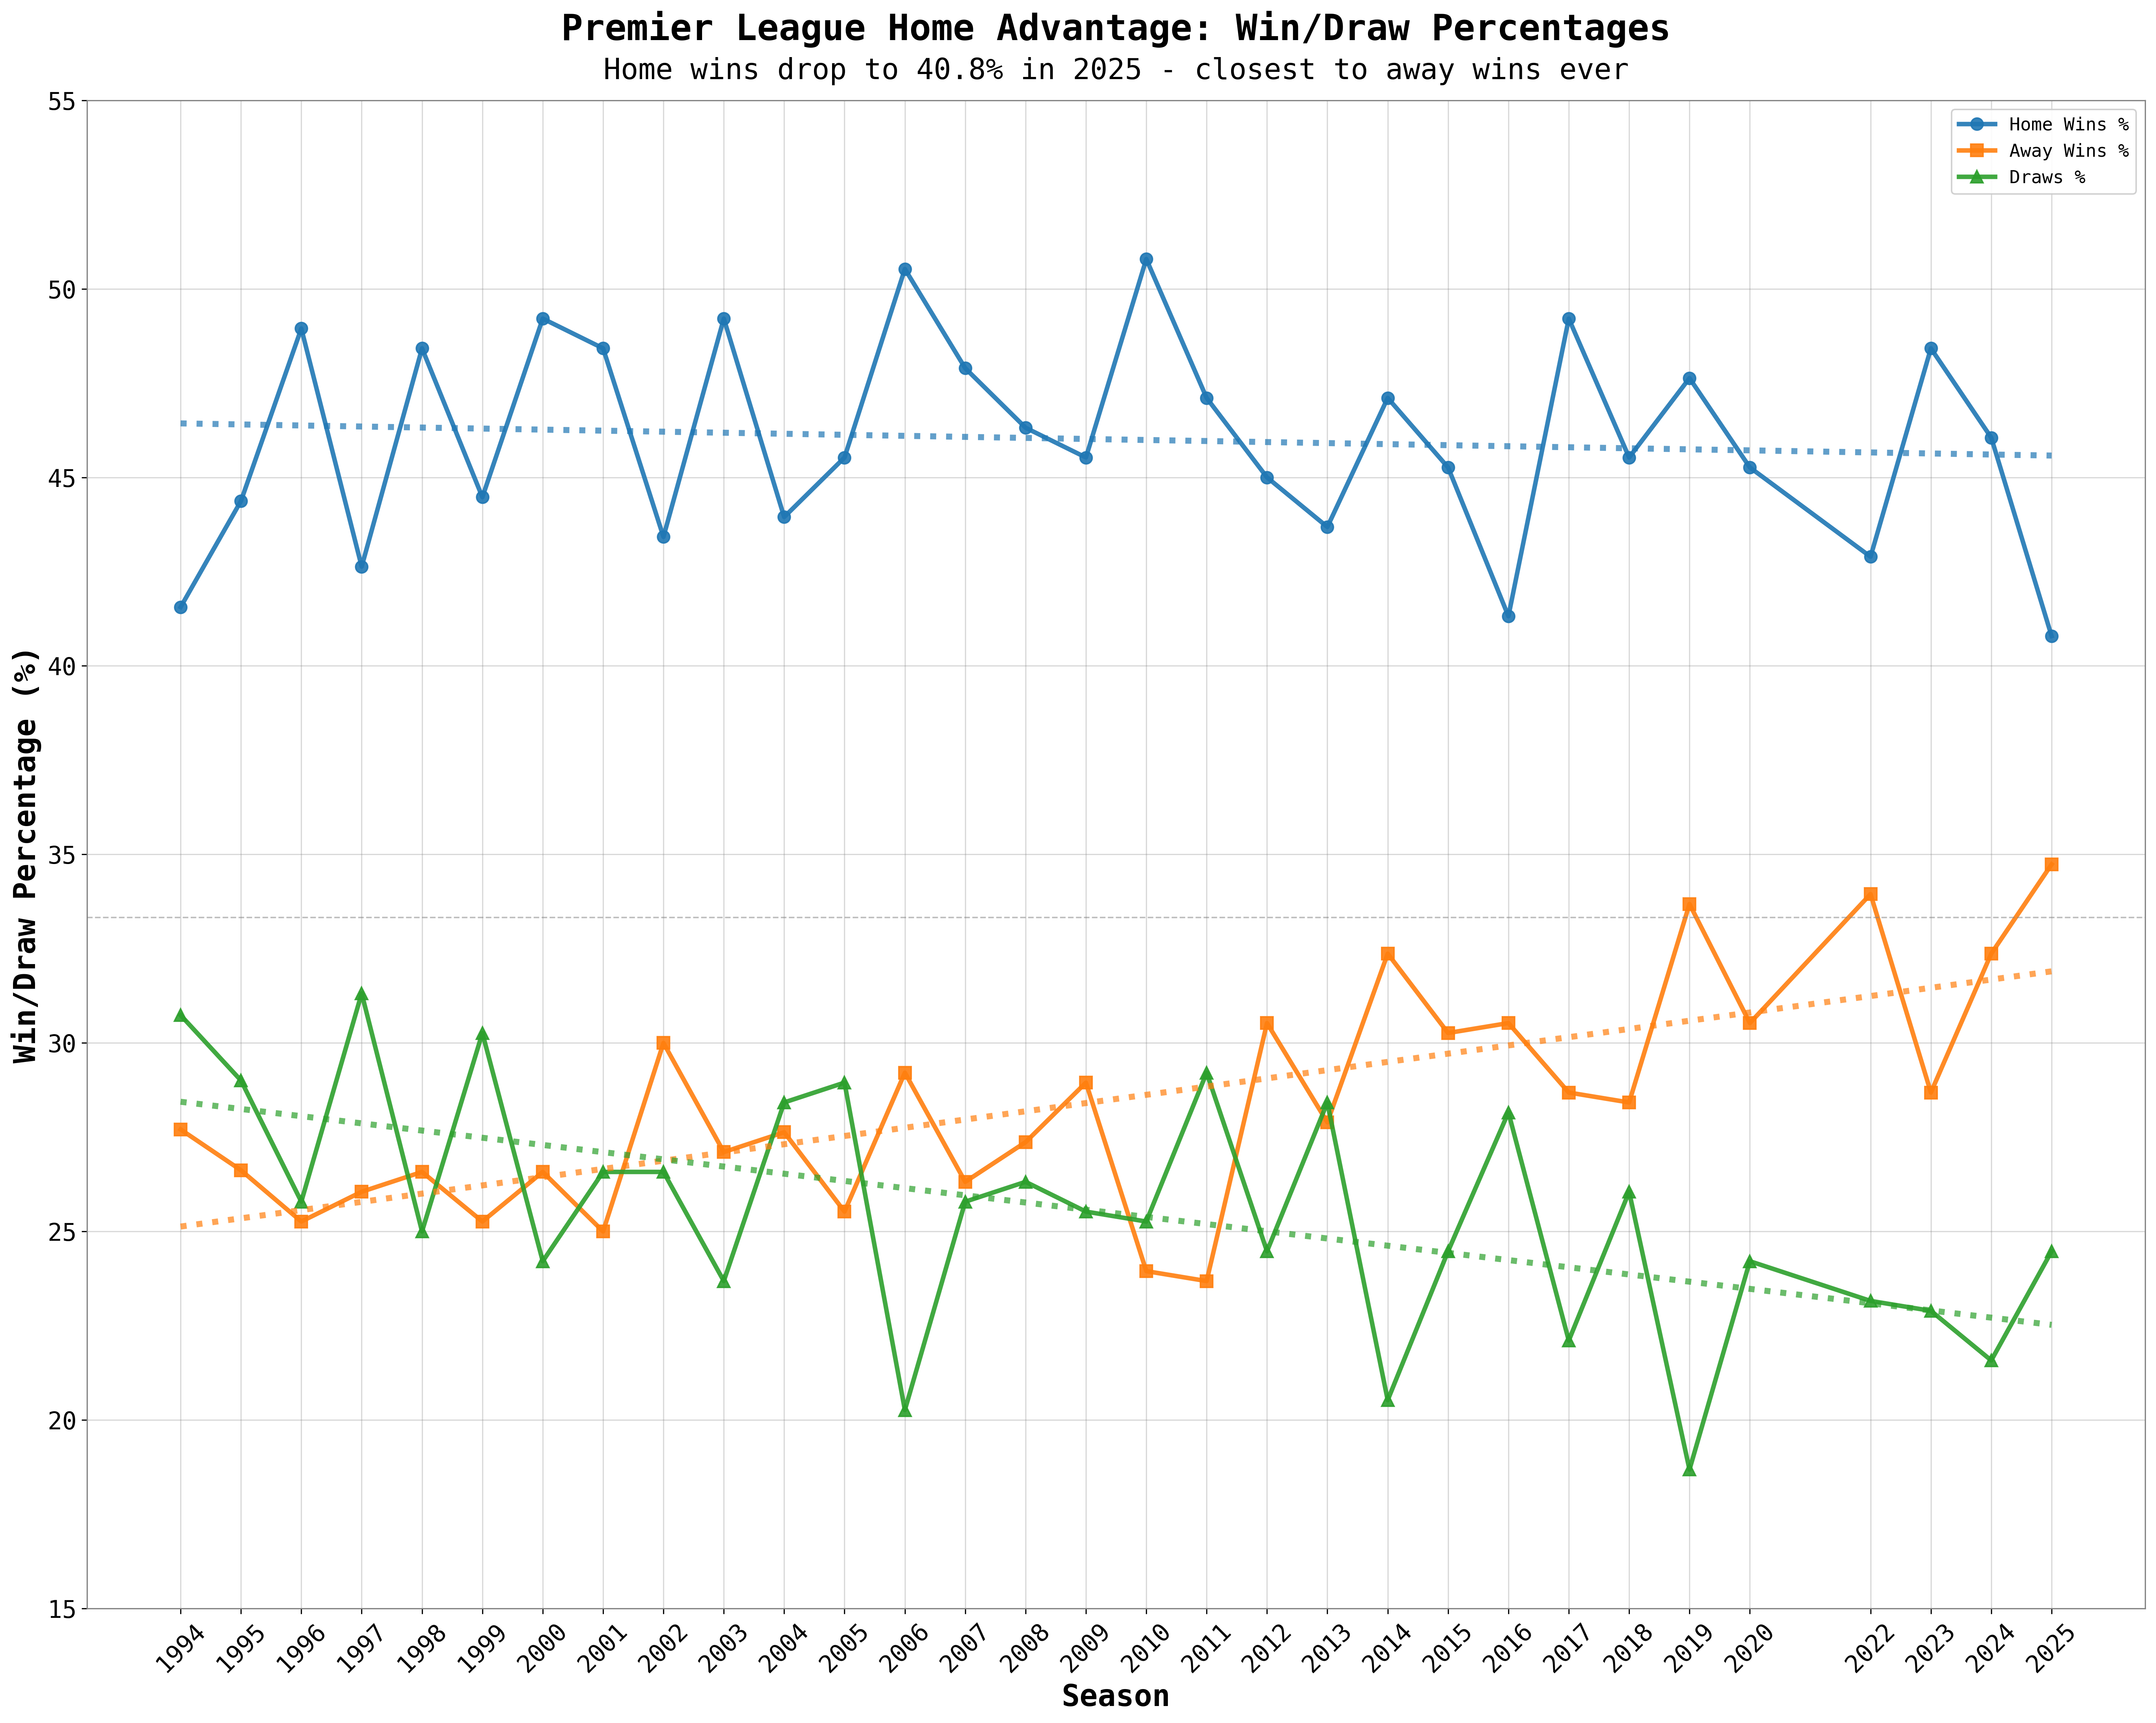

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import sys
sys.path.append('../../style')
from style_config import StyleConfig

# Apply consistent styling
StyleConfig.apply_style()

def create_home_advantage_percentages(df):
    """
    Create a line chart showing home win %, draw %, and away win % per season
    """
    # Calculate season stats for match results
    season_stats = df.groupby('Season').agg({
        'FTR': ['count', lambda x: (x == 'H').mean(), lambda x: (x == 'A').mean(), lambda x: (x == 'D').mean()]
    })
    
    # Flatten column names
    season_stats.columns = ['total_games', 'pct_H', 'pct_A', 'pct_D']
    
    # Convert to percentages (0-100)
    season_stats['pct_H'] *= 100
    season_stats['pct_A'] *= 100
    season_stats['pct_D'] *= 100
    
    # Create the plot
    fig, ax = plt.subplots(figsize=StyleConfig.PLOT['figure_size'])
    
    # Define distinct colors for each outcome
    home_color = '#1f77b4'    # Blue for home wins
    away_color = '#ff7f0e'    # Orange for away wins  
    draw_color = '#2ca02c'    # Green for draws
    
    # Plot lines
    home_line = ax.plot(season_stats.index, season_stats['pct_H'], 
                       color=home_color, linewidth=3, marker='o', markersize=8, 
                       label='Home Wins %', alpha=StyleConfig.PLOT['alpha'])
    
    away_line = ax.plot(season_stats.index, season_stats['pct_A'], 
                       color=away_color, linewidth=3, marker='s', markersize=8, 
                       label='Away Wins %', alpha=StyleConfig.PLOT['alpha'])
    
    draw_line = ax.plot(season_stats.index, season_stats['pct_D'], 
                       color=draw_color, linewidth=3, marker='^', markersize=8, 
                       label='Draws %', alpha=StyleConfig.PLOT['alpha'])
    
    # Add trend lines
    seasons = season_stats.index.values
    pct_H = season_stats['pct_H'].values
    pct_A = season_stats['pct_A'].values
    pct_D = season_stats['pct_D'].values
    
    # Calculate linear regression for each percentage
    home_slope, home_intercept, home_r, home_p, home_se = stats.linregress(seasons, pct_H)
    home_trend_line = home_slope * seasons + home_intercept
    
    away_slope, away_intercept, away_r, away_p, away_se = stats.linregress(seasons, pct_A)
    away_trend_line = away_slope * seasons + away_intercept
    
    draw_slope, draw_intercept, draw_r, draw_p, draw_se = stats.linregress(seasons, pct_D)
    draw_trend_line = draw_slope * seasons + draw_intercept
    
    # Plot trend lines (dotted)
    ax.plot(seasons, home_trend_line, 
           color=home_color, linestyle=':', linewidth=4, alpha=0.7)
    
    ax.plot(seasons, away_trend_line, 
           color=away_color, linestyle=':', linewidth=4, alpha=0.7)
    
    ax.plot(seasons, draw_trend_line, 
           color=draw_color, linestyle=':', linewidth=4, alpha=0.7)
    
    # Highlight 2025 season with annotation showing home advantage decline
    latest_season = season_stats.index.max()
    latest_home_pct = season_stats.loc[latest_season, 'pct_H']
    latest_away_pct = season_stats.loc[latest_season, 'pct_A']
    
    # Add annotation pointing to the convergence
    """ax.annotate(f'Home: {latest_home_pct:.1f}%\nAway: {latest_away_pct:.1f}%', 
                xy=(latest_season, latest_home_pct),
                xytext=(latest_season - 3, latest_home_pct + 5),
                fontsize=StyleConfig.FONTS['label_size'] - 2,
                fontweight='bold',
                ha='center',
                bbox=dict(boxstyle="round,pad=0.4", 
                         facecolor='lightcyan', alpha=0.9),
                arrowprops=dict(arrowstyle='->', 
                              color='gray', lw=2))"""
    
    # Add horizontal line at 33.33% for reference (equal chances)
    ax.axhline(y=33.33, color='gray', 
               linestyle='--', alpha=0.5, linewidth=1,
               )
    
    # Styling
    ax.set_xlabel('Season', fontsize=20, 
                  color='black', fontweight='bold')
    ax.set_ylabel('Win/Draw Percentage (%)', fontsize=20,
                  color='black', fontweight='bold')
    
    # Main title
    ax.set_title('Premier League Home Advantage: Win/Draw Percentages',
                fontsize=StyleConfig.FONTS['title_size'], 
                color=StyleConfig.COLORS['text_color'],
                pad=40, fontweight='bold')

    # Subtitle
    ax.text(0.5, 1.01, f'Home wins drop to {latest_home_pct:.1f}% in {latest_season} - closest to away wins ever',
            transform=ax.transAxes,
            fontsize=StyleConfig.FONTS['title_size'] * 0.8,
            color=StyleConfig.COLORS['text_color'],
            ha='center', va='bottom',
            fontweight='normal')
    
    # Grid
    ax.grid(True, alpha=0.3, color=StyleConfig.COLORS['grid_color'])
    
    # Legend
    ax.legend(fontsize=StyleConfig.FONTS['legend_size'],
              title_fontsize=StyleConfig.FONTS['legend_title_size'],
              loc='upper right', framealpha=0.9)
    
    # Spines
    for spine in ax.spines.values():
        spine.set_color(StyleConfig.COLORS['axis_color'])
        spine.set_linewidth(StyleConfig.PLOT['line_width'])
    
    # Tick parameters
    ax.tick_params(colors=StyleConfig.COLORS['text_color'], 
                   labelsize=16)
    
    # Set x-axis to show every season
    ax.set_xticks(season_stats.index)
    ax.set_xticklabels([f'{int(season)}' for season in season_stats.index], rotation=45)
    
    # Set y-axis limits and ticks
    ax.set_ylim(15, 55)  # Reasonable range for percentages
    ax.set_yticks(np.arange(15, 56, 5))  # Every 5%
    
    plt.tight_layout()
    
    # Print trend analysis
    print(f"Home Win % Trend: slope = {home_slope:.3f} %/year (p = {home_p:.3f})")
    print(f"Away Win % Trend: slope = {away_slope:.3f} %/year (p = {away_p:.3f})")
    print(f"Draw % Trend: slope = {draw_slope:.3f} %/year (p = {draw_p:.3f})")
    print(f"Home Advantage Gap: {latest_home_pct - latest_away_pct:.1f} percentage points")
    
    return fig, ax, season_stats

# Usage:
fig, ax, stats = create_home_advantage_percentages(df[df["Season"] != 2021])
plt.show()
# 
# # Save the plot
# fig.savefig('premier_league_home_advantage_percentages.png', 
#             dpi=StyleConfig.PLOT['dpi'], bbox_inches=